В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/OlenaBloshchynska/OlenaBloshchynskaDS/blob/main/process_bank_churn.py

Посилання на process_bank_churn.py файл на GitHub

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Add the directory to the Python path
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

# Verify the path is added correctly
print(sys.path)

# Try importing your module
import process_bank_churn
from process_bank_churn import preprocess_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/Colab Notebooks']


In [89]:
?preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.7605
The model is likely overfitting.
Depth of the tree: 23


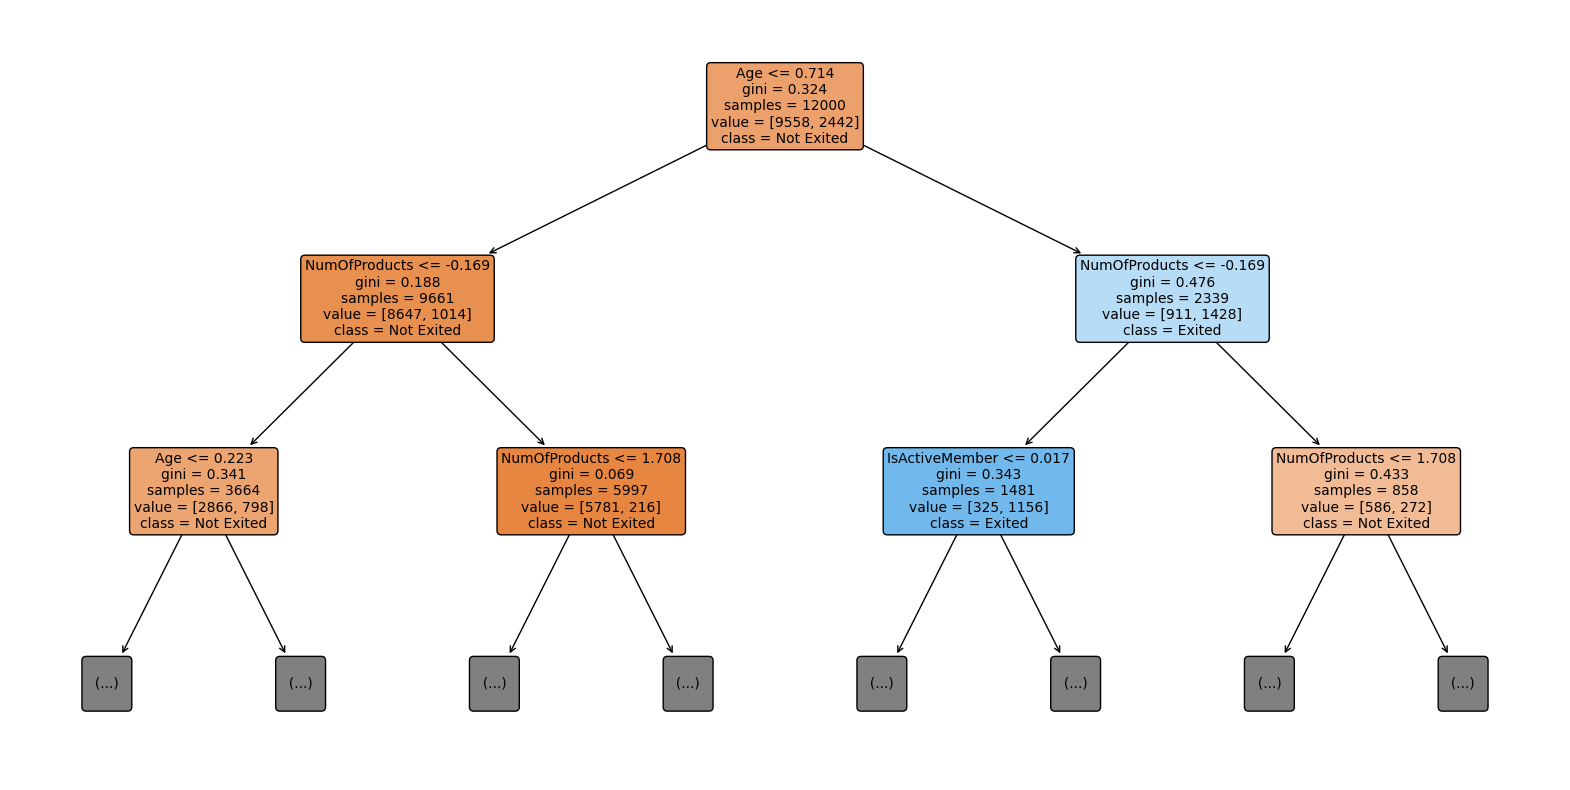

Top 10 most important features:
              feature  importance
3                 Age    0.339715
6       NumOfProducts    0.168379
9     EstimatedSalary    0.075549
1          CustomerId    0.075051
0                  id    0.074077
5             Balance    0.072693
2         CreditScore    0.070632
4              Tenure    0.038542
8      IsActiveMember    0.033198
11  Geography_Germany    0.015516


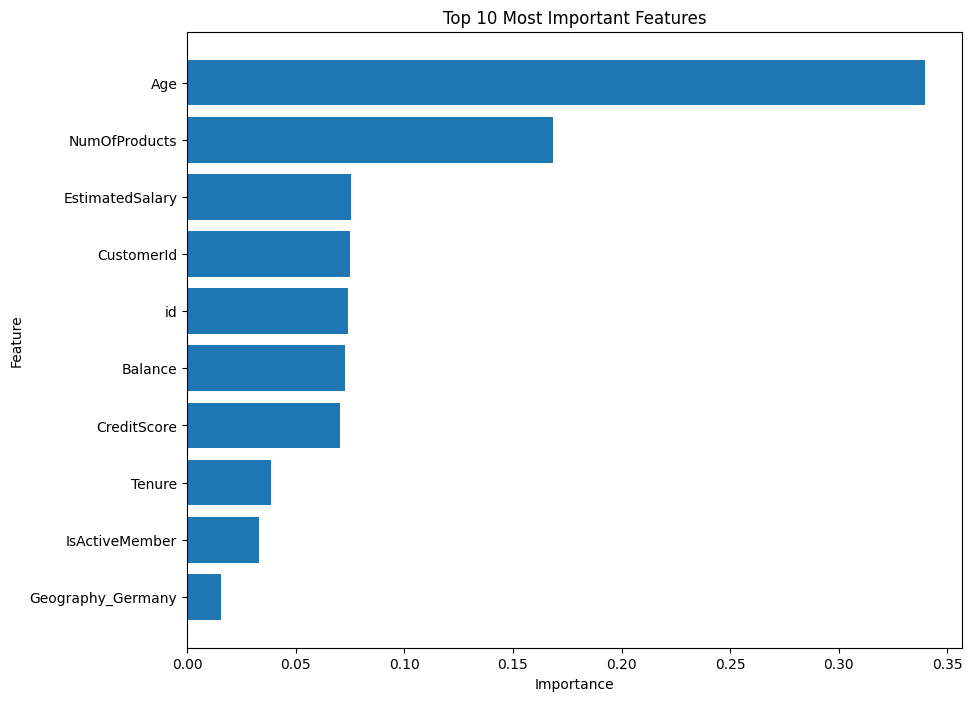

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Assuming preprocess_data is already defined as in the previous step
# Define the preprocess_data function here or import from process_bank_churn.py if you saved it
# from process_bank_churn import preprocess_data

# Load the data (replace 'path_to_your_csv_file.csv' with the actual path to your data)
raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Preprocess the data
X_train, y_train, X_val, y_val, input_cols, scaler, encoder = preprocess_data(raw_df)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

# Calculate ROC-AUC
train_roc_auc = roc_auc_score(y_train, train_probs)
val_roc_auc = roc_auc_score(y_val, val_probs)

print(f"Train ROC-AUC: {train_roc_auc:.4f}")
print(f"Validation ROC-AUC: {val_roc_auc:.4f}")

# Check for overfitting or underfitting
if train_roc_auc > val_roc_auc + 0.05:
    print("The model is likely overfitting.")
elif val_roc_auc > train_roc_auc + 0.05:
    print("The model is likely underfitting.")
else:
    print("The model is well-fitted.")

# Output the depth of the tree
print(f"Depth of the tree: {model.get_depth()}")

# Visualize the tree up to depth 2
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=input_cols, max_depth=2, filled=True, rounded=True, class_names=["Not Exited", "Exited"])
plt.show()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': model.feature_importances_
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Output the top 10 most important features
top_10_features = importance_df.head(10)
print("Top 10 most important features:")
print(top_10_features)

# Plot the top 10 most important features
plt.figure(figsize=(10,8))
plt.barh(top_10_features['feature'], top_10_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [3]:
# Define the range of parameters to test
max_leaf_nodes_options = [10, 20, 30, 40, 50, None]
max_depth_options = [3, 5, 7, 10, None]

best_val_roc_auc = 0
best_params = {}

# Iterate over different parameter combinations
for max_leaf_nodes in max_leaf_nodes_options:
    for max_depth in max_depth_options:
        # Train the Decision Tree Classifier with current parameters
        model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
        model.fit(X_train, y_train)

        # Predict probabilities
        train_probs = model.predict_proba(X_train)[:, 1]
        val_probs = model.predict_proba(X_val)[:, 1]

        # Calculate ROC-AUC
        train_roc_auc = roc_auc_score(y_train, train_probs)
        val_roc_auc = roc_auc_score(y_val, val_probs)

        print(f"max_leaf_nodes: {max_leaf_nodes}, max_depth: {max_depth} - Train ROC-AUC: {train_roc_auc:.4f}, Validation ROC-AUC: {val_roc_auc:.4f}")

        # Update the best parameters if current model is better
        if val_roc_auc > best_val_roc_auc:
            best_val_roc_auc = val_roc_auc
            best_params = {'max_leaf_nodes': max_leaf_nodes, 'max_depth': max_depth}
            best_train_roc_auc = train_roc_auc

print(f"\nBest parameters: max_leaf_nodes={best_params['max_leaf_nodes']}, max_depth={best_params['max_depth']}")
print(f"Best Train ROC-AUC: {best_train_roc_auc:.4f}")
print(f"Best Validation ROC-AUC: {best_val_roc_auc:.4f}")

max_leaf_nodes: 10, max_depth: 3 - Train ROC-AUC: 0.8972, Validation ROC-AUC: 0.8911
max_leaf_nodes: 10, max_depth: 5 - Train ROC-AUC: 0.9015, Validation ROC-AUC: 0.9002
max_leaf_nodes: 10, max_depth: 7 - Train ROC-AUC: 0.9015, Validation ROC-AUC: 0.9002
max_leaf_nodes: 10, max_depth: 10 - Train ROC-AUC: 0.9015, Validation ROC-AUC: 0.9002
max_leaf_nodes: 10, max_depth: None - Train ROC-AUC: 0.9015, Validation ROC-AUC: 0.9002
max_leaf_nodes: 20, max_depth: 3 - Train ROC-AUC: 0.8972, Validation ROC-AUC: 0.8911
max_leaf_nodes: 20, max_depth: 5 - Train ROC-AUC: 0.9163, Validation ROC-AUC: 0.9160
max_leaf_nodes: 20, max_depth: 7 - Train ROC-AUC: 0.9179, Validation ROC-AUC: 0.9173
max_leaf_nodes: 20, max_depth: 10 - Train ROC-AUC: 0.9179, Validation ROC-AUC: 0.9173
max_leaf_nodes: 20, max_depth: None - Train ROC-AUC: 0.9179, Validation ROC-AUC: 0.9173
max_leaf_nodes: 30, max_depth: 3 - Train ROC-AUC: 0.8972, Validation ROC-AUC: 0.8911
max_leaf_nodes: 30, max_depth: 5 - Train ROC-AUC: 0.9258,

In [4]:
# Define the range of parameters to test
max_leaf_nodes_options = [30, 35, 40, 45, 50]
max_depth_options = [6, 7, 8]

best_val_roc_auc = 0
best_params = {}

# Iterate over different parameter combinations
for max_leaf_nodes in max_leaf_nodes_options:
    for max_depth in max_depth_options:
        # Train the Decision Tree Classifier with current parameters
        model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
        model.fit(X_train, y_train)

        # Predict probabilities
        train_probs = model.predict_proba(X_train)[:, 1]
        val_probs = model.predict_proba(X_val)[:, 1]

        # Calculate ROC-AUC
        train_roc_auc = roc_auc_score(y_train, train_probs)
        val_roc_auc = roc_auc_score(y_val, val_probs)

        print(f"max_leaf_nodes: {max_leaf_nodes}, max_depth: {max_depth} - Train ROC-AUC: {train_roc_auc:.4f}, Validation ROC-AUC: {val_roc_auc:.4f}")

        # Update the best parameters if current model is better
        if val_roc_auc > best_val_roc_auc:
            best_val_roc_auc = val_roc_auc
            best_params = {'max_leaf_nodes': max_leaf_nodes, 'max_depth': max_depth}
            best_train_roc_auc = train_roc_auc

print(f"\nBest parameters: max_leaf_nodes={best_params['max_leaf_nodes']}, max_depth={best_params['max_depth']}")
print(f"Best Train ROC-AUC: {best_train_roc_auc:.4f}")
print(f"Best Validation ROC-AUC: {best_val_roc_auc:.4f}")

max_leaf_nodes: 30, max_depth: 6 - Train ROC-AUC: 0.9211, Validation ROC-AUC: 0.9180
max_leaf_nodes: 30, max_depth: 7 - Train ROC-AUC: 0.9214, Validation ROC-AUC: 0.9187
max_leaf_nodes: 30, max_depth: 8 - Train ROC-AUC: 0.9213, Validation ROC-AUC: 0.9183
max_leaf_nodes: 35, max_depth: 6 - Train ROC-AUC: 0.9279, Validation ROC-AUC: 0.9224
max_leaf_nodes: 35, max_depth: 7 - Train ROC-AUC: 0.9231, Validation ROC-AUC: 0.9183
max_leaf_nodes: 35, max_depth: 8 - Train ROC-AUC: 0.9227, Validation ROC-AUC: 0.9185
max_leaf_nodes: 40, max_depth: 6 - Train ROC-AUC: 0.9293, Validation ROC-AUC: 0.9218
max_leaf_nodes: 40, max_depth: 7 - Train ROC-AUC: 0.9291, Validation ROC-AUC: 0.9237
max_leaf_nodes: 40, max_depth: 8 - Train ROC-AUC: 0.9292, Validation ROC-AUC: 0.9223
max_leaf_nodes: 45, max_depth: 6 - Train ROC-AUC: 0.9300, Validation ROC-AUC: 0.9197
max_leaf_nodes: 45, max_depth: 7 - Train ROC-AUC: 0.9306, Validation ROC-AUC: 0.9238
max_leaf_nodes: 45, max_depth: 8 - Train ROC-AUC: 0.9298, Validat

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

max_depth: 1 - Train ROC-AUC: 0.7447, Validation ROC-AUC: 0.7349
max_depth: 2 - Train ROC-AUC: 0.8429, Validation ROC-AUC: 0.8465
max_depth: 3 - Train ROC-AUC: 0.8972, Validation ROC-AUC: 0.8911
max_depth: 4 - Train ROC-AUC: 0.9113, Validation ROC-AUC: 0.9113
max_depth: 5 - Train ROC-AUC: 0.9258, Validation ROC-AUC: 0.9235
max_depth: 6 - Train ROC-AUC: 0.9344, Validation ROC-AUC: 0.9194
max_depth: 7 - Train ROC-AUC: 0.9419, Validation ROC-AUC: 0.9172
max_depth: 8 - Train ROC-AUC: 0.9501, Validation ROC-AUC: 0.9085
max_depth: 9 - Train ROC-AUC: 0.9610, Validation ROC-AUC: 0.8740
max_depth: 10 - Train ROC-AUC: 0.9712, Validation ROC-AUC: 0.8418
max_depth: 11 - Train ROC-AUC: 0.9802, Validation ROC-AUC: 0.8254
max_depth: 12 - Train ROC-AUC: 0.9879, Validation ROC-AUC: 0.8178
max_depth: 13 - Train ROC-AUC: 0.9940, Validation ROC-AUC: 0.8096
max_depth: 14 - Train ROC-AUC: 0.9971, Validation ROC-AUC: 0.7961
max_depth: 15 - Train ROC-AUC: 0.9987, Validation ROC-AUC: 0.7867
max_depth: 16 - Tra

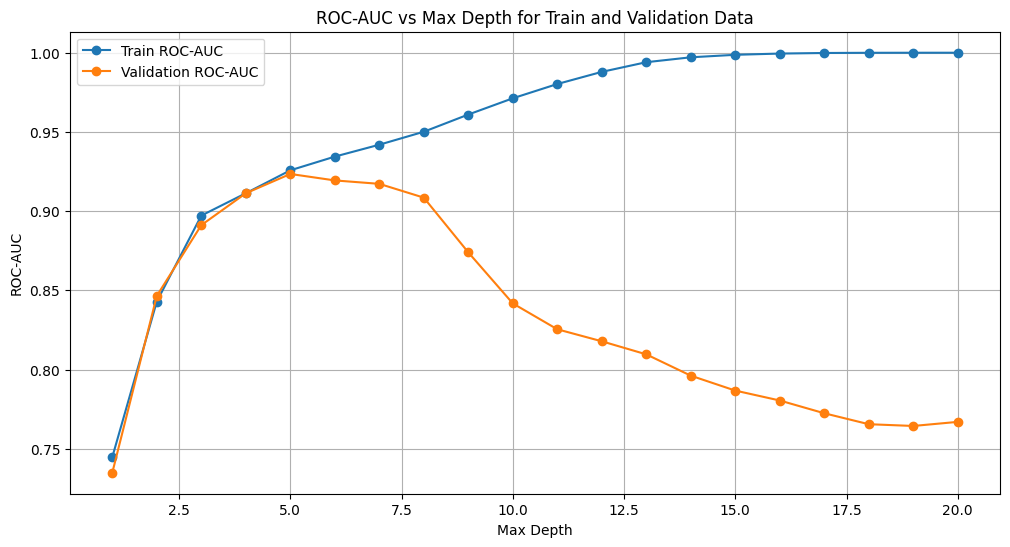

In [5]:
# Lists to store the results
train_roc_auc_scores = []
val_roc_auc_scores = []
max_depths = range(1, 21)

# Iterate over different values of max_depth
for max_depth in max_depths:
    # Train the Decision Tree Classifier with current max_depth
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    model.fit(X_train, y_train)

    # Predict probabilities
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC
    train_roc_auc = roc_auc_score(y_train, train_probs)
    val_roc_auc = roc_auc_score(y_val, val_probs)

    # Store the results
    train_roc_auc_scores.append(train_roc_auc)
    val_roc_auc_scores.append(val_roc_auc)

    print(f"max_depth: {max_depth} - Train ROC-AUC: {train_roc_auc:.4f}, Validation ROC-AUC: {val_roc_auc:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(max_depths, train_roc_auc_scores, label='Train ROC-AUC', marker='o')
plt.plot(max_depths, val_roc_auc_scores, label='Validation ROC-AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC vs Max Depth for Train and Validation Data')
plt.legend()
plt.grid(True)
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [17]:
best_max_depth = max_depths[val_roc_auc_scores.index(max(val_roc_auc_scores))]
print(f"Best max_depth: {best_max_depth}")

Best max_depth: 5


In [18]:
# Натренуємо модель з найкращим значенням max_depth
model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
import pandas as pd

# Load test data from CSV file
test_raw_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from process_bank_churn import preprocess_new_data

# Load training data
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Exclude "Surname" column
train_df = train_df.drop(columns=['Surname'])

# Define categorical and numeric columns
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender']

# Separate features and target
X_train = train_df.drop(columns=['Exited'])
y_train = train_df['Exited']

# Define preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit preprocessing pipeline on training data
preprocessor.fit(X_train)

# Train Decision Tree model
best_max_depth = 5  # Example: Replace with your best max_depth found
model = DecisionTreeClassifier(random_state=42, max_depth=best_max_depth)
model.fit(preprocessor.transform(X_train), y_train)

# Load test data
test_raw_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

# Preprocess test data using the fitted preprocessing pipeline
X_test = preprocess_new_data(test_raw_df, preprocessor, numeric_cols, categorical_cols)

# Predict probabilities for test data
test_probs = model.predict_proba(X_test)[:, 1]

# Prepare submission file
submission_df = pd.DataFrame({
    'CustomerId': test_raw_df['CustomerId'],  # Assuming 'CustomerId' is the identifier
    'Exited': test_probs
})

# Save submission to CSV file
submission_df.to_csv('submission.csv', index=False)

TypeError: preprocess_new_data() missing 1 required positional argument: 'categorical_cols'